## Première partie

1) Toujours avec scikit-learn, lancez l'algorithme du k-means, et interprétez les résultats. Faites de même avec l’algorithme de mixture de gaussienne.

2) Ensuite, on cherchera à prédire si le « math score » est supérieur au score médian, en fonction des autres variables. Ca sera donc un problème de classification bi-classe: la classe 0 (math score inférieur au score médian) et la classe 1 (math score supérieur ou égal au score médian).

- D’abord, implémentez vous-meme (sans scikit-learn, juste avec Python+numpy) l’algorithme du 1-plus-proche voisin sur ces données, et analysez les résultats.

- Ensuite, implémentez vous-même l’algorithme Bayesien naif (sans scikit-learn) sur les 5 premières variables catégorielles, pour prédire si le « math score » est supérieur au score médian. N’oubliez pas de commenter votre code.

- Puis, implémentez vous-même l’algorithme "gaussian naive bayes" (sans scikit-learn) sur les  variables continues restantes, pour prédire si le « math score » est supérieur au score médian.

- avec scikit-learn, appliquez la régression logistique pour ce même problème de prédiction. N’oubliez pas de commenter et d’analyser les résultats. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import homogeneity_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("StudentsPerformance.csv")
print(df.shape)
df.head()


(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


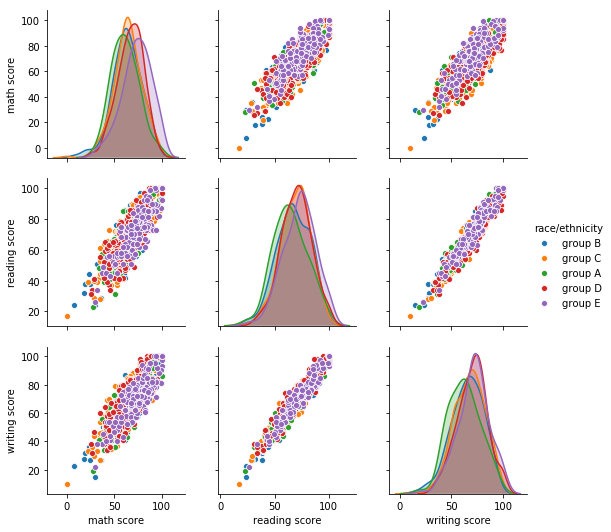

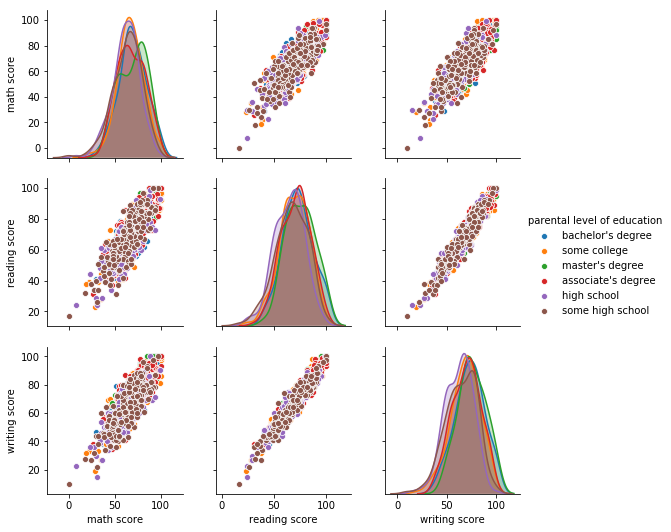

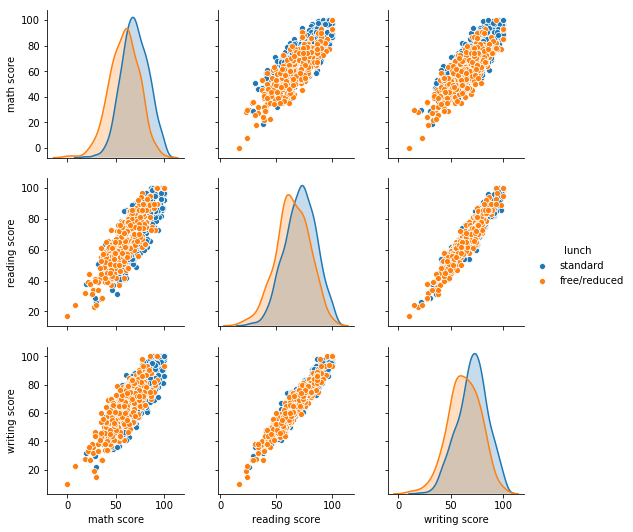

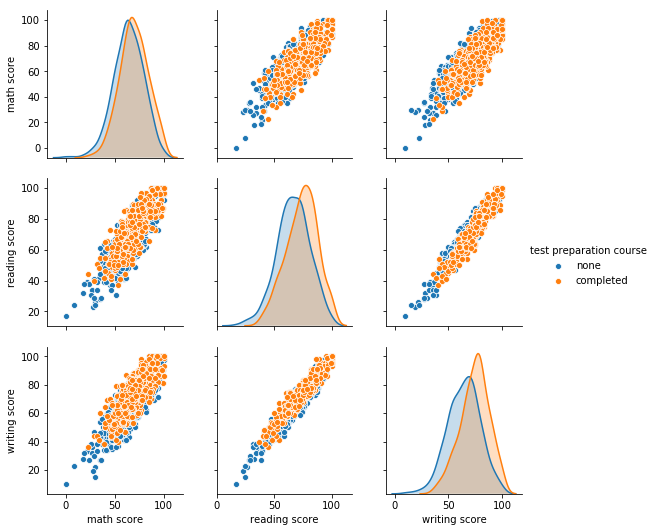

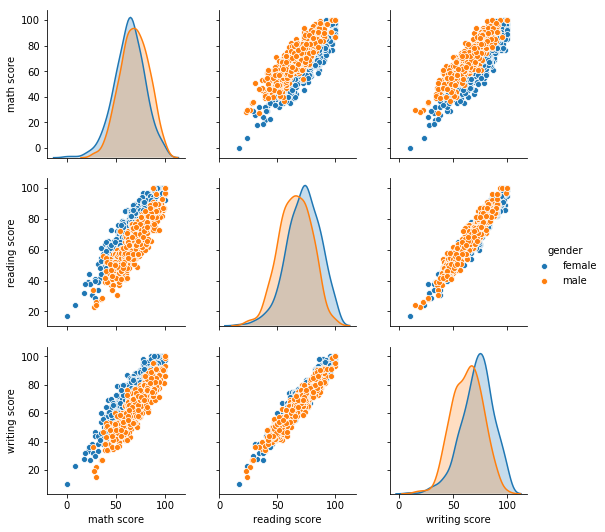

In [3]:
sns.pairplot(data = df, hue="race/ethnicity")
sns.pairplot(data = df, hue="parental level of education")
sns.pairplot(data = df, hue="lunch")
sns.pairplot(data = df, hue="test preparation course")
sns.pairplot(data = df, hue="gender")


KMeans: 0.010


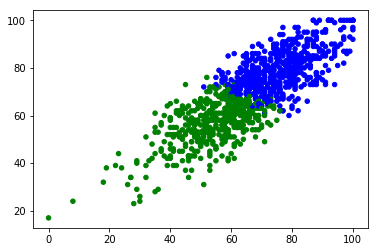

In [4]:
scores = df[["math score","reading score","writing score"]]

kmeans = KMeans(n_clusters=2)
kmeans.fit(scores)
y_kmeans = kmeans.predict(scores)
print("KMeans: %.3f" % homogeneity_score(y_kmeans, df.gender))

colormap=np.array(['green','blue'])
plt.scatter(scores['math score'], scores['reading score'], c=colormap[kmeans.labels_], s=20)

# non globulaires => bof bof


GMM: 0.423


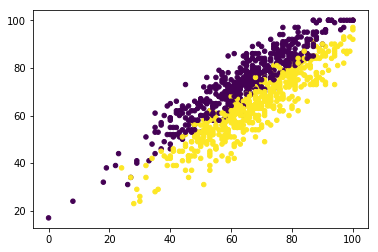

In [5]:
gmm = GaussianMixture(n_components=2, covariance_type='tied', n_init=1000, init_params='random')
gmm.fit(scores)
y_gmm = gmm.predict(scores)
print("GMM: %.3f" % homogeneity_score(y_gmm, df.gender))
    
plt.scatter(scores['math score'], scores['reading score'], c=y_gmm, s=20)

# réussit à capturer les distributions gaussiennes


## Seconde partie


In [6]:
math_median = scores['math score'].median()

df['sup_math_median'] = np.where(df['math score'] >= math_median, 1, 0)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sup_math_median
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


In [19]:

y = df.sup_math_median
X = df[['reading score', 'writing score']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



In [41]:
def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

def predict(x, X_train, y_train):
    dists = X_train.apply(lambda row: euclidean_distance(x1=np.array([row['reading score'], row['writing score']]), x2=x), axis=1)
    return y_train[dists.idxmax()]


predict(np.array([72, 74]), X_train, y_train)


143    39.623226
682    26.248809
585     4.472136
217    46.097722
32      9.000000
dtype: float64


0

In [42]:
euclidean_distance(x1=np.array([72, 74]), x2=np.array([43, 47]))

39.6232255123179

,reading score,writing score
794,52,51
900,84,89
593,76,73
22,54,53
152,70,66
